## BCE Loss with Logits
Why? Numerical instability. Exponentiating things leads to very large numbers (larger than a computer can represent)

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load in the data
from sklearn.datasets import load_breast_cancer

# Call the function
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Inputs and targets
X, Y = data.data, data.target
print(X.shape, Y.shape)

(569, 30) (569,)


In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [6]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
D = X.shape[1]
print(D)

## Now all the fun Pytorch stuff
# Build the model
model = nn.Linear(D,1)

30


In [9]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()    # Binary Classification Entropy Loss Function with Logits
optimizer = torch.optim.Adam(model.parameters())

In [10]:
# Convert data into torch tensors
X_train2 = torch.from_numpy(X_train.astype(np.float32))
X_test2 = torch.from_numpy(X_test.astype(np.float32))
y_train2 = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test2 = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

print(X_train.shape, y_train.shape)

(381, 30) (381,)


In [11]:
# Train the model
n_epochs = 1000
losses = []

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(X_train2)
    loss = criterion(outputs, y_train2)
    
    # Backward and Optimization
    loss.backward()
    optimizer.step()
    
    # Get test loss
    outputs_test = model(X_test2)
    loss_test = criterion(outputs_test, y_test2)
    
    # Save losses
    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()
    
    if (it + 1) % 50 == 0:
        print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.4287, Test Loss: 0.4131
Epoch 100/1000, Train Loss: 0.3264, Test Loss: 0.3118
Epoch 150/1000, Train Loss: 0.2671, Test Loss: 0.2565
Epoch 200/1000, Train Loss: 0.2274, Test Loss: 0.2212
Epoch 250/1000, Train Loss: 0.1991, Test Loss: 0.1970
Epoch 300/1000, Train Loss: 0.1781, Test Loss: 0.1795
Epoch 350/1000, Train Loss: 0.1619, Test Loss: 0.1665
Epoch 400/1000, Train Loss: 0.1490, Test Loss: 0.1565
Epoch 450/1000, Train Loss: 0.1385, Test Loss: 0.1486
Epoch 500/1000, Train Loss: 0.1298, Test Loss: 0.1422
Epoch 550/1000, Train Loss: 0.1225, Test Loss: 0.1370
Epoch 600/1000, Train Loss: 0.1161, Test Loss: 0.1327
Epoch 650/1000, Train Loss: 0.1107, Test Loss: 0.1290
Epoch 700/1000, Train Loss: 0.1058, Test Loss: 0.1259
Epoch 750/1000, Train Loss: 0.1015, Test Loss: 0.1233
Epoch 800/1000, Train Loss: 0.0977, Test Loss: 0.1210
Epoch 850/1000, Train Loss: 0.0942, Test Loss: 0.1190
Epoch 900/1000, Train Loss: 0.0911, Test Loss: 0.1172
Epoch 950/1000, Train Loss: 0

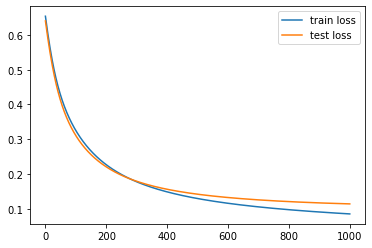

In [12]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [16]:
# Get accuracy
with torch.no_grad():
    p_train = model(X_train2)     # p_train is probability
    p_train = (p_train.numpy() > 0)   # Positive = True or Negative = False
    train_acc = np.mean(y_train2.numpy() == p_train)   # 1 or 0 --> 같으면 정확한 것이다. True = 1, False = 0
    
    p_test = model(X_test2)
    p_test = (p_test.numpy() > 0)
    test_acc = np.mean(y_test2.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9869, Test acc: 0.9734


In [19]:
p_train = model(X_train2)
p_train.detach().numpy() > 0

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [